In [1]:
import math
import concurrent.futures
import numpy as np
import matplotlib.pyplot as plt
from random import random


class CrystalGrid:
    def __init__(self, grid_size):
        self.grid_size = grid_size
        self.grid = np.zeros((self.grid_size, self.grid_size), dtype='int32')
        self.grid[grid_size // 2][grid_size // 2] = 1
        self.nr_of_particles = 1
        self.R_max = 5.0
        
    def iterate(self, probability):
        self.move_random_walker()
        if self.is_random_walker_lost():
            self.start_random_walker()
        self.stick_walker_if_possible(probability)
        
    def start_random_walker(self):
        self.random_walker_R = self.R_max + 5.0
        
        theta = 2 * math.pi * random()

        self.random_walker_x = self.grid_size // 2 + int(math.floor(self.random_walker_R * math.cos(theta)))
        self.random_walker_y = self.grid_size // 2 + int(math.floor(self.random_walker_R * math.sin(theta)))
        
    def move_random_walker(self):
        temp_x = self.random_walker_x
        temp_y = self.random_walker_y
        r = random()
        
        if r < 0.25:
            temp_x += 1
        elif r < 0.50:
            temp_y += 1
        elif r < 0.75:
            temp_x -= 1
        else:
            temp_y -= 1
            
        if temp_x > 5 and temp_y > 5 and temp_x < self.grid_size - 5 and temp_y < self.grid_size - 5:
            if self.grid[temp_x][temp_y] == 0:
                self.random_walker_x = temp_x
                self.random_walker_y = temp_y
            
    def is_random_walker_lost(self):
        dx = self.random_walker_x - self.grid_size // 2
        dy = self.random_walker_y - self.grid_size // 2
        
        distance = math.sqrt(dx*dx + dy*dy)
        return distance > 3 * self.R_max
    
    def is_random_walker_touching(self):
        return  self.grid[self.random_walker_x+1][self.random_walker_y] == 1 or \
                self.grid[self.random_walker_x-1][self.random_walker_y] == 1 or \
                self.grid[self.random_walker_x][self.random_walker_y+1] == 1 or \
                self.grid[self.random_walker_x][self.random_walker_y-1] == 1
        
    def stick_walker_if_possible(self, probability):
        if random() < probability and self.is_random_walker_touching():
            self.grid[self.random_walker_x][self.random_walker_y] = 1
            self.nr_of_particles += 1
            
            dx = self.random_walker_x - self.grid_size // 2
            dy = self.random_walker_y - self.grid_size // 2
            distance = math.sqrt(dx*dx + dy*dy)
            
            if distance > self.R_max:
                self.R_max = distance
                
            self.start_random_walker()
    
    def display_grid(self, fit_crystal=True):
        img = plt.imshow(self.grid,interpolation='nearest')
        
        if fit_crystal:
            ax = plt.gca()
            min_x, max_x, min_y, max_y = self.find_extremities()
            padding = 10
            ax.set_xlim(min_x - padding, max_x + padding)
            ax.set_ylim(min_y - padding, max_y + padding)
        
        plt.show(img)
    
    def find_extremities(self):
        min_x, min_y, max_x, max_y = self.grid_size, self.grid_size, 0, 0
        for i in range(self.grid_size):
            for j in range(self.grid_size):
                if self.grid[i][j] == 1:
                    if i < min_y:
                        min_y = i
                    if j < min_x:
                        min_x = j
                    if i > max_y:
                        max_y = i
                    if j > max_x:
                        max_x = j
        return min_x, max_x, min_y, max_y

p=0.01 t=0 particles:1
p=0.01 t=1000000 particles:302
p=0.01 t=2000000 particles:549
p=0.01 t=3000000 particles:793
p=0.01 t=4000000 particles:993


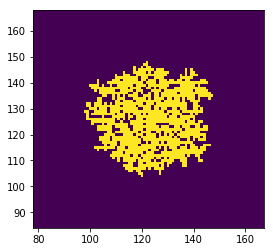

p=0.5 t=0 particles:1
p=0.5 t=1000000 particles:561
p=0.5 t=2000000 particles:882
p=0.5 t=3000000 particles:1029


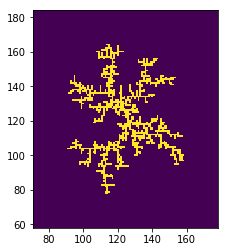

In [17]:
for p in [0.01, 0.5]:
    crystal = CrystalGrid(250)
    crystal.start_random_walker()
    particle_count = 1
    for t in range(5000000):
            if t % 1000000 == 0: 
                print("p={} t={} particles:{}".format(p, t, crystal.nr_of_particles))
                if crystal.nr_of_particles * 0.8 < particle_count and crystal.nr_of_particles > 2:
                    break
                else:
                    particle_count = crystal.nr_of_particles
            crystal.iterate(p)
    crystal.display_grid()

probability: 0.001
particles=1
particles=350
particles=659
particles=893
particles=1125
particles=1341
particles=1568
particles=1754
particles=1930
particles=2127


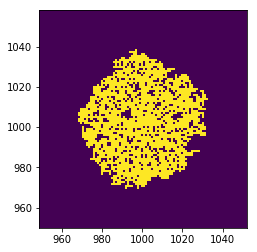

probability: 0.04
particles=1
particles=1987


In [ ]:
p_samples = [0.001, 0.04] #, 0.01, 0.1, 0.3, 0.5, 0.7, 0.9, 0.9999]

# for the crystal growth I want to see the <R_max> vs time for the same sticking 
# condition for different p sticking values. You obtain the average, <>, by running
# multiple realizations at the same p. Make the system larger than what 
# I have given so you can run for a longer time.

steps = 100
time = 1000000
grid_size = 2000
snapshot = 1000

R_max_array = [[0] * snapshot] * len(p_samples)

for p in p_samples:
    print("probability: {}".format(p))
    crystal = CrystalGrid(grid_size)
    crystal.start_random_walker()
    for i in range(steps):
        i % 10 == 0 and print("particles={}".format(crystal.nr_of_particles))
        for t in range(time):
            crystal.iterate(p)
            if t % snapshot == 0:
                R_max_array[p_samples.index(p)][t//snapshot] += crystal.R_max
                
    crystal.display_grid()

Starting thread for probability: 0.01
Starting thread for probability: 0.001
Starting thread for probability: 0.7
Starting thread for probability: 0.1
Starting thread for probability: 0.3
Starting thread for probability: 0.9
Starting thread for probability: 0.5
Starting thread for probability: 0.9999
Thread_p=0.001 particles=35 finished=0.0%
Thread_p=0.01 particles=311 finished=0.0%
Thread_p=0.1 particles=554 finished=0.0%
Thread_p=0.3 particles=483 finished=0.0%
Thread_p=0.5 particles=507 finished=0.0%
Thread_p=0.7 particles=428 finished=0.0%
Thread_p=0.9 particles=534 finished=0.0%
Thread_p=0.9999 particles=671 finished=0.0%
Thread_p=0.001 particles=381 finished=10.0%
Thread_p=0.01 particles=1852 finished=10.0%
Thread_p=0.1 particles=2080 finished=10.0%
Thread_p=0.3 particles=1868 finished=10.0%
Thread_p=0.001 particles=668 finished=20.0%
Thread_p=0.01 particles=2864 finished=20.0%
Thread_p=0.5 particles=1834 finished=10.0%
Thread_p=0.1 particles=2862 finished=20.0%
Thread_p=0.7 part

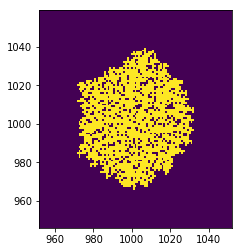

Finished thread for P=0.001
-----------------------


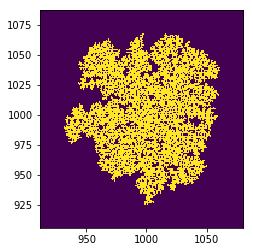

Finished thread for P=0.01
-----------------------
Thread_p=0.1 particles=6279 finished=90.0%
Thread_p=0.9 particles=3960 finished=40.0%
Thread_p=0.3 particles=5305 finished=70.0%
Thread_p=0.9999 particles=4096 finished=40.0%
Thread_p=0.7 particles=2636 finished=50.0%
Thread_p=0.5 particles=4599 finished=60.0%


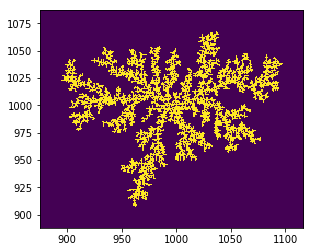

Finished thread for P=0.1
-----------------------
Thread_p=0.3 particles=5755 finished=80.0%
Thread_p=0.9 particles=4547 finished=50.0%
Thread_p=0.5 particles=5028 finished=70.0%
Thread_p=0.7 particles=2908 finished=60.0%
Thread_p=0.3 particles=6113 finished=90.0%
Thread_p=0.9999 particles=4528 finished=50.0%


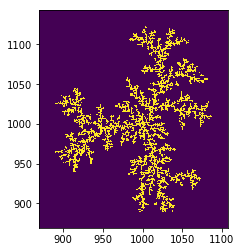

Finished thread for P=0.3
-----------------------
Thread_p=0.5 particles=5371 finished=80.0%
Thread_p=0.9 particles=4921 finished=60.0%
Thread_p=0.7 particles=3145 finished=70.0%
Thread_p=0.9999 particles=4927 finished=60.0%
Thread_p=0.5 particles=5749 finished=90.0%
Thread_p=0.7 particles=3357 finished=80.0%
Thread_p=0.9 particles=5323 finished=70.0%


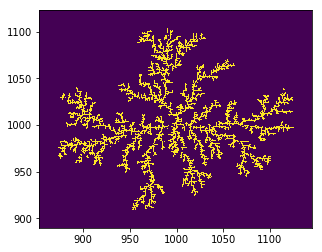

Finished thread for P=0.5
-----------------------
Thread_p=0.9999 particles=5287 finished=70.0%
Thread_p=0.7 particles=3594 finished=90.0%
Thread_p=0.9 particles=5669 finished=80.0%
Thread_p=0.9999 particles=5638 finished=80.0%


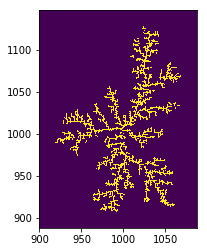

Finished thread for P=0.7
-----------------------
Thread_p=0.9 particles=6013 finished=90.0%
Thread_p=0.9999 particles=6069 finished=90.0%


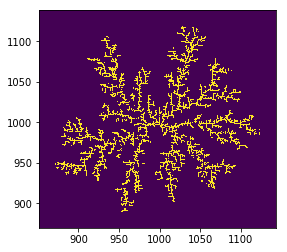

Finished thread for P=0.9
-----------------------


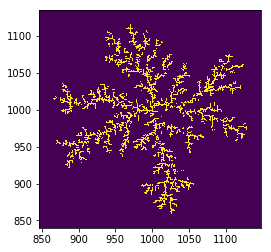

Finished thread for P=0.9999
-----------------------


In [18]:
p_samples = [0.001, 0.01, 0.1, 0.3, 0.5, 0.7, 0.9, 0.9999]
snapshot = 1000

R_max_array = [None] * len(p_samples)

def run(p, grid_size=2000, steps=100, time=1000000, snapshot=1000):
    print("Starting thread for probability: {}".format(p))
    crystal = CrystalGrid(grid_size)
    crystal.start_random_walker()
    R_array = [0] * snapshot
    for i in range(steps):
        for t in range(time):
            crystal.iterate(p)
            if t % snapshot == 0:
                R_array[t//snapshot] += crystal.R_max
                
        i % 10 == 0 and print("Thread_p={} particles={} finished={}%".format(p, crystal.nr_of_particles, (i*time)/(steps*time)*100))
                
    return crystal, R_array


with concurrent.futures.ProcessPoolExecutor(max_workers=9) as executor:
    future_to_result = {executor.submit(run, p): p for p in p_samples}
    for future in concurrent.futures.as_completed(future_to_result):
        p = future_to_result[future]
        try:
            crystal, R_max = future.result()
        except Exception as exc:
            print("Generated an exception: {}".format(exc))
        else:
            crystal.display_grid()
            R_max_array[p_samples.index(p)] = R_max
            print("Finished thread for P={}".format(p))
            print("-----------------------")

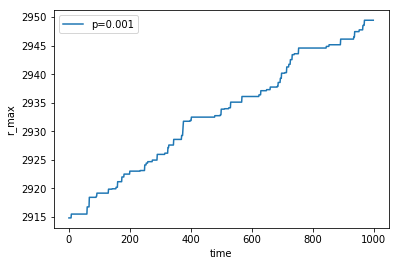

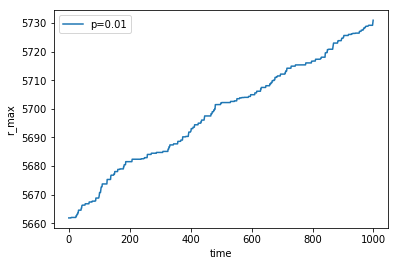

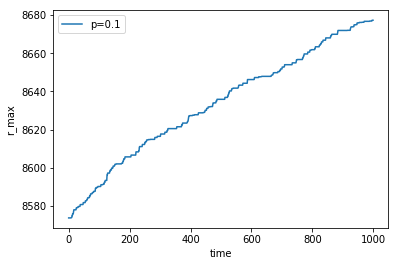

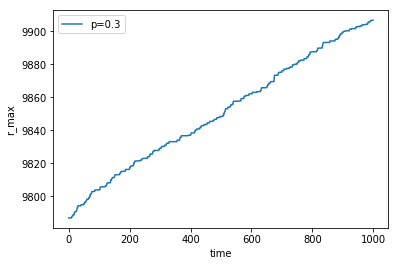

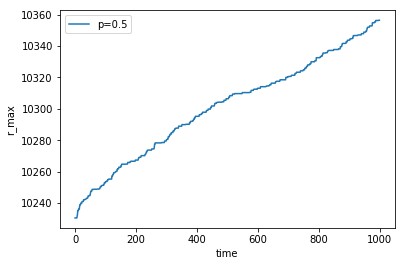

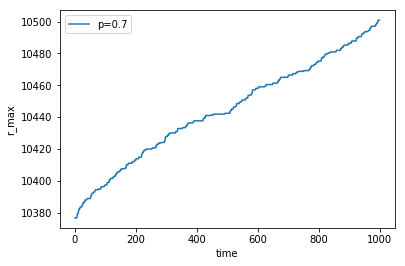

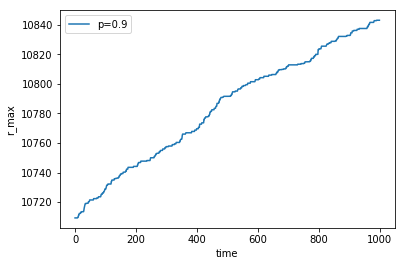

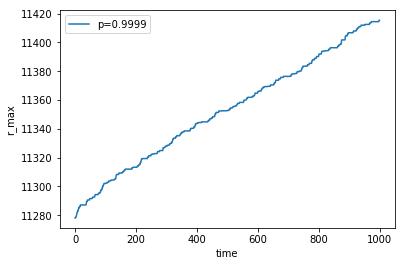

In [21]:

for p in p_samples:
    plt.xlabel('time')
    plt.ylabel('r_max')
    R_max = R_max_array[p_samples.index(p)]
    plt.plot(R_max, label = "p={}".format(p))
    plt.legend(loc='best')
    plt.show()
    